# Problem Statement
Using Breast Cancer dataset we will train and predict model for two cancer types ->['malignant', 'benign']
mallignant[0] tumers are cancerous while benign[1] tumors are non cancerous

# Step: 1 Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import svm
from sklearn import datasets
import warnings
warnings.filterwarnings("ignore")

# Step: 2 Loading dataset

In [2]:
cancer = datasets.load_breast_cancer()

In [3]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

##### mallignant[0] tumers are cancerous while benign[1] tumors are non cancerous 

# Step: 3 Data Prepration 

In [5]:
cancer_df = pd.DataFrame(cancer.data, columns= cancer.feature_names)
cancer_df['target'] = cancer.target

In [6]:
cancer_df.head(25)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890,0
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902,0
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758,0
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300,0
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678,0
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440,0
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368,0
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510,0
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720,0
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750,0


In [7]:
cancer_df['target']

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

In [8]:
cancer_df.shape

(569, 31)

### Visualizing data 

In [9]:
cancer_df.groupby('target').describe()

mean radius                                                             \
             count       mean       std     min     25%     50%    75%    max   
target                                                                          
0            212.0  17.462830  3.203971  10.950  15.075  17.325  19.59  28.11   
1            357.0  12.146524  1.780512   6.981  11.080  12.200  13.37  17.85   

       mean texture             ... worst symmetry          \
              count       mean  ...            75%     max   
target                          ...                          
0             212.0  21.604906  ...       0.359225  0.6638   
1             357.0  17.914762  ...       0.298300  0.4228   

       worst fractal dimension                                         \
                         count      mean       std      min       25%   
target                                                                  
0                        212.0  0.091530  0.021553  0.05504  0.076302   
1                        357.0  0.079442  0.013804  0.05521  0.070090   

                                   
            50%       75%     max  
target                             
0       0.08760  0.102625  0.2075  
1       0.07712  0.085410  0.1486  

[2 rows x 240 columns]

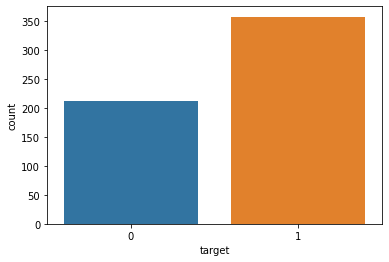

In [10]:
sns.countplot(cancer_df.target , label= 'count')

##### dividing data to training and testing data 

In [11]:
X= cancer_df.drop('target', axis = 1)

In [12]:
y= cancer_df['target']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [14]:
X_train.shape

(455, 30)

In [15]:
X_test.shape

(114, 30)

In [16]:
y_train.shape

(455,)

In [17]:
y_test.shape

(114,)

# Step 4: Training model

In [18]:
from sklearn import metrics

In [19]:
svm_model = svm.SVC(kernel= 'linear', C= 2)

In [20]:
svm_model.fit(X_train, y_train)

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

# Step 5: Testing model 

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

In [22]:
predict_test = svm_model.predict(X_test)

In [23]:
accuracy = metrics.accuracy_score(y_test, predict_test)

In [24]:
accuracy

0.9649122807017544

In [25]:
compare = pd.DataFrame(data= np.c_[y_test ,predict_test],
                     columns= ['True test', 'Predict test'])

In [26]:
compare

,True test,Predict test
0,1,1
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
109,1,1
110,0,0
111,1,1
112,0,0


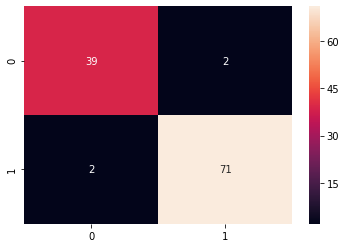

In [27]:
cm = confusion_matrix(y_test, predict_test)
sns.heatmap(cm, annot= True)

In [28]:
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        41
           1       0.97      0.97      0.97        73

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

